# Click-Through Logistic Regression  

A logistic regression model that will predict whether or not a user will click on an ad based on the features of that user.

The advertising data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [101]:
# Import libraries
import numpy as np
import pandas as pd

In [103]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [4]:
# Read data
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [5]:
# Check first few lines of data
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

** Create a histogram of the Age**

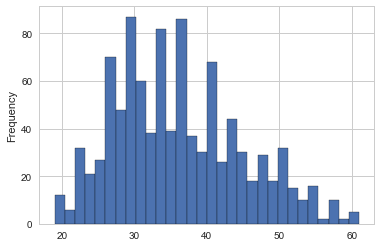

In [105]:
# Create histrogram with Pandas
ad_data['Age'].plot.hist(bins = 30)

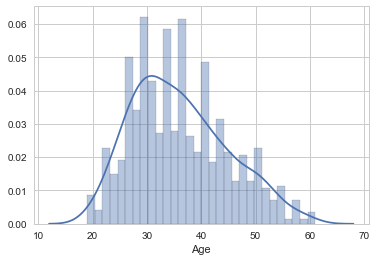

In [107]:
# Create histogram using Seaborn
sns.set_style('whitegrid')
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(ad_data['Age'], bins = 30)

**Create a jointplot showing Area Income versus Age.**

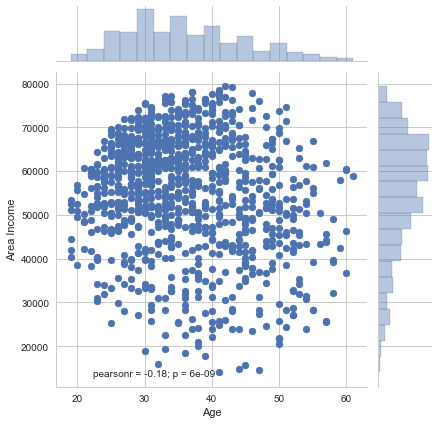

In [35]:
sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

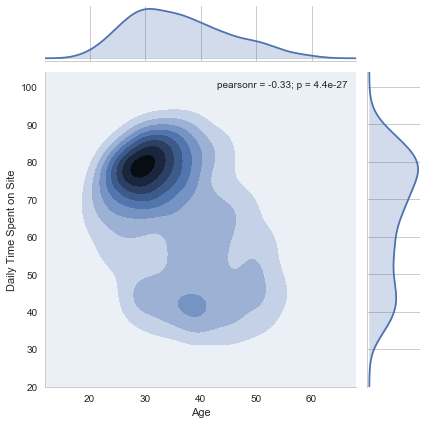

In [36]:
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', data = ad_data, kind = 'kde')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

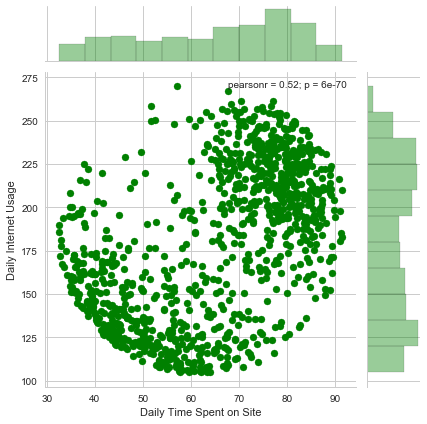

In [38]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, color = 'green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

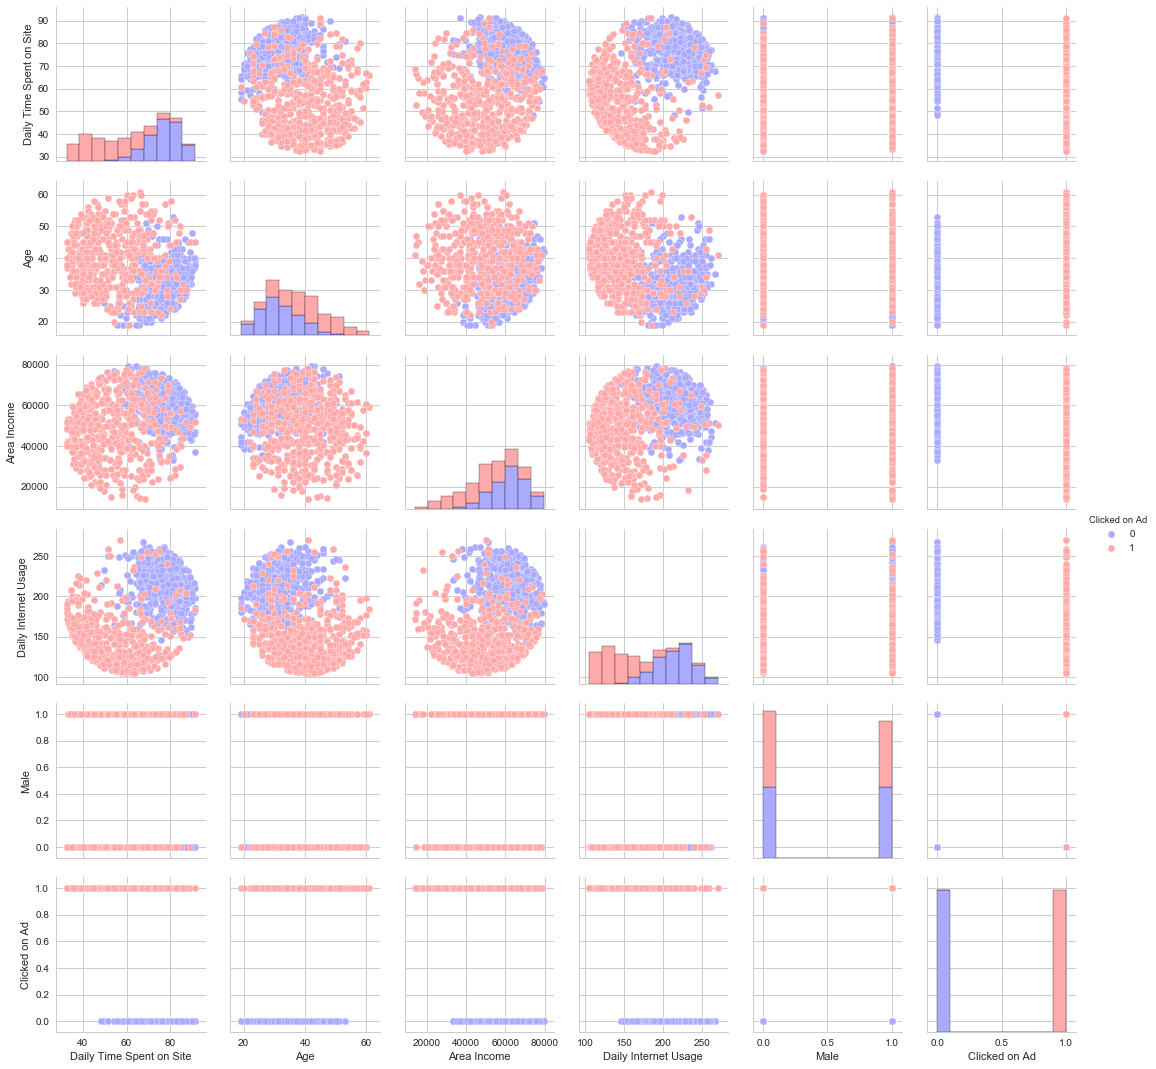

In [40]:
sns.pairplot(ad_data, hue = 'Clicked on Ad', palette = 'bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [41]:
# Look at column names
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [89]:
# Separate data into x and y variables
x = ad_data.drop(['Clicked on Ad','Ad Topic Line','City','Country','Timestamp'], axis = 1) #Exclude target and string variables
y = ad_data['Clicked on Ad']

# Verify
x.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'],
      dtype='object')

In [90]:
# Use x and y variables to split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [91]:
# Import model
from sklearn.linear_model import LogisticRegression

In [92]:
# Create instance of the model
logmodel = LogisticRegression()

In [93]:
# Fit model on training set
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [95]:
predictions = logmodel.predict(x_test)

** Create a classification report for the model**

In [108]:
# Import functions
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90       146
          1       0.96      0.82      0.89       154

avg / total       0.90      0.89      0.89       300



In [109]:
# Print confusion matrix
print(confusion_matrix(y_test, predictions))

[[141   5]
 [ 27 127]]
